Tanisha Rani

email tanishabansal16@gmail.com



In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("employee_attrition.csv")
df

,MonthlyIncome,Age,JobSatisfaction,YearsAtCompany,OverTime,Attrition
0,13191.0,41.000000,4.000000,1.0,Yes,1.0
1,15859.0,44.000000,4.000000,17.0,Yes,0.0
2,9014.0,28.000000,1.000000,NaN,No,NaN
3,4936.0,NaN,1.000000,NaN,No,NaN
4,3885.0,27.000000,4.000000,0.0,Yes,1.0
...,...,...,...,...,...,...
195,10592.0,31.000000,8.244641,5.0,Yes,0.0
196,7157.0,91.167232,2.000000,16.0,No,0.0
197,13504.0,47.000000,1.000000,0.0,Yes,0.0
198,12262.0,28.000000,1.000000,1.0,Yes,NaN


In [3]:
df.shape

(200, 6)

In [4]:
df.isnull().sum()

MonthlyIncome      19
Age                20
JobSatisfaction    18
YearsAtCompany     18
OverTime            0
Attrition          19
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MonthlyIncome    181 non-null    float64
 1   Age              180 non-null    float64
 2   JobSatisfaction  182 non-null    float64
 3   YearsAtCompany   182 non-null    float64
 4   OverTime         200 non-null    object 
 5   Attrition        181 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.5+ KB


In [6]:
df.describe()

,MonthlyIncome,Age,JobSatisfaction,YearsAtCompany,Attrition
count,181.000000,180.000000,182.000000,182.000000,181.000000
mean,12891.550990,42.725957,2.887068,10.935620,0.676326
std,7385.406267,15.330312,1.701058,8.686150,0.751718
min,3002.000000,22.000000,1.000000,0.000000,0.000000
25%,7478.000000,32.750000,2.000000,5.000000,0.000000
50%,12331.000000,41.000000,3.000000,9.000000,1.000000
75%,16365.000000,49.000000,4.000000,15.000000,1.000000
max,36053.572910,91.167232,8.244641,38.528277,3.041494


In [7]:
df.dtypes

MonthlyIncome      float64
Age                float64
JobSatisfaction    float64
YearsAtCompany     float64
OverTime            object
Attrition          float64
dtype: object

In [8]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(), inplace=True)

In [9]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [10]:
df['JobSatisfaction'].fillna(df['JobSatisfaction'].mode()[0], inplace=True)

In [11]:
df['YearsAtCompany'].fillna(df['YearsAtCompany'].median(), inplace=True)

In [12]:
df.dropna(subset=['Attrition'], inplace=True)

In [13]:
df


,MonthlyIncome,Age,JobSatisfaction,YearsAtCompany,OverTime,Attrition
0,13191.00000,41.000000,4.000000,1.000000,Yes,1.000000
1,15859.00000,44.000000,4.000000,17.000000,Yes,0.000000
4,3885.00000,27.000000,4.000000,0.000000,Yes,1.000000
5,6434.00000,29.000000,4.000000,10.000000,No,3.041494
6,12891.55099,41.000000,2.000000,38.528277,Yes,1.000000
...,...,...,...,...,...,...
194,17551.00000,22.000000,3.000000,5.000000,Yes,1.000000
195,10592.00000,31.000000,8.244641,5.000000,Yes,0.000000
196,7157.00000,91.167232,2.000000,16.000000,No,0.000000
197,13504.00000,47.000000,1.000000,0.000000,Yes,0.000000


In [14]:
df.isnull().sum()

MonthlyIncome      0
Age                0
JobSatisfaction    0
YearsAtCompany     0
OverTime           0
Attrition          0
dtype: int64

In [15]:
df.columns

Index(['MonthlyIncome', 'Age', 'JobSatisfaction', 'YearsAtCompany', 'OverTime',
       'Attrition'],
      dtype='object')

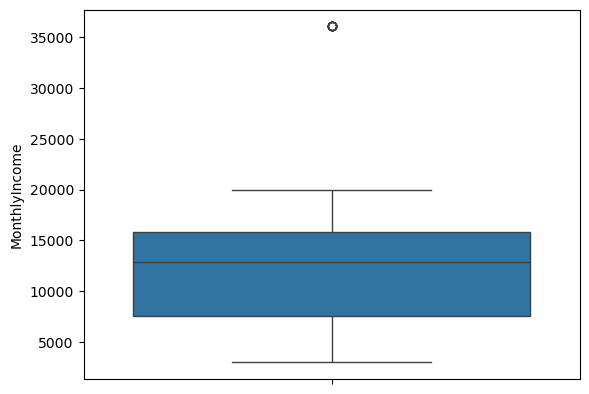

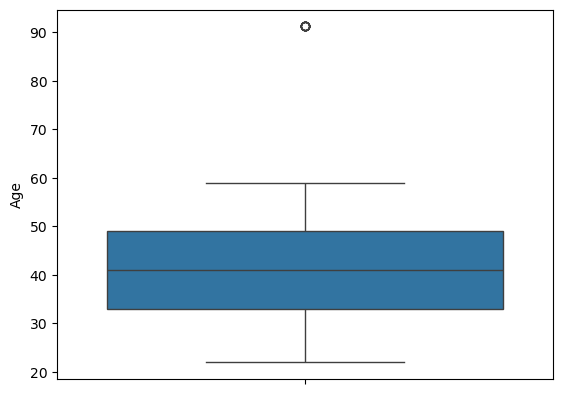

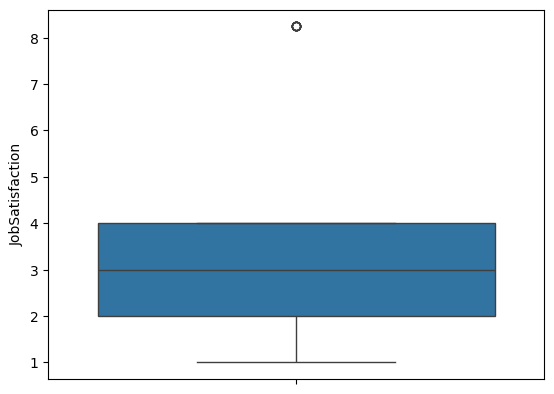

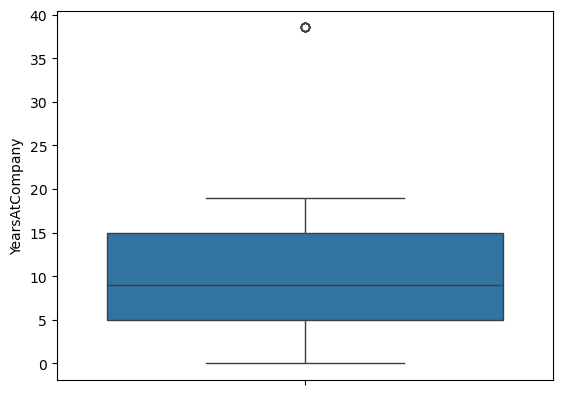

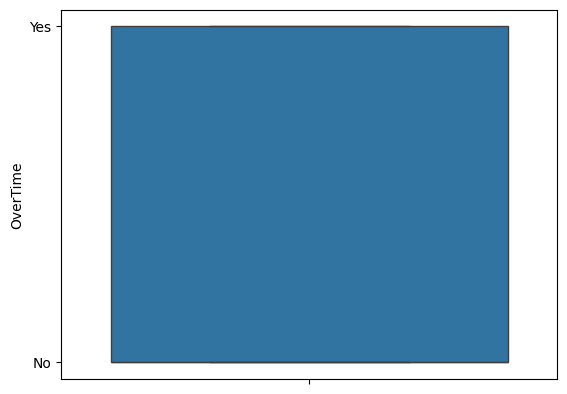

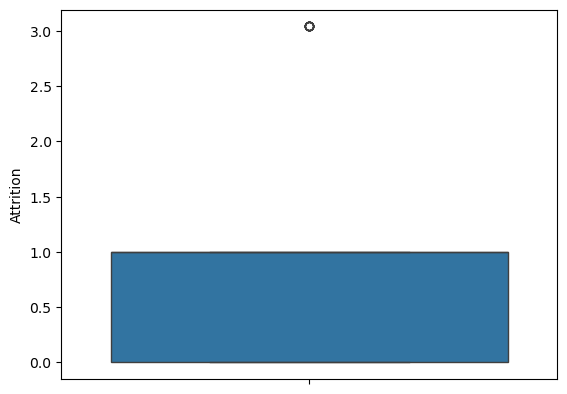

In [16]:
column=['MonthlyIncome', 'Age', 'JobSatisfaction', 'YearsAtCompany', 'OverTime',
       'Attrition']
for i in column:
    
     plt.figure()
     sns.boxplot(y=i, data=df)

LOGISTIC REGRESSION

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample

In [19]:
le = LabelEncoder()
df['OverTime'] = le.fit_transform(df['OverTime'])
df = df[df['Attrition'].isin([0, 1])]
df['Attrition'] = df['Attrition'].astype(int)
X = df[['MonthlyIncome', 'Age', 'JobSatisfaction', 'YearsAtCompany', 'OverTime']]
y = df['Attrition']
print(X.head())
print(y.head())

   MonthlyIncome   Age  JobSatisfaction  YearsAtCompany  OverTime
0    13191.00000  41.0              4.0        1.000000         1
1    15859.00000  44.0              4.0       17.000000         1
4     3885.00000  27.0              4.0        0.000000         1
6    12891.55099  41.0              2.0       38.528277         1
8     4670.00000  53.0              4.0        9.000000         1
0    1
1    0
4    1
6    1
8    0
Name: Attrition, dtype: int32


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("\nLogistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Results
Accuracy: 0.34285714285714286
              precision    recall  f1-score   support

           0       0.29      0.10      0.15        20
           1       0.36      0.67      0.47        15

    accuracy                           0.34        35
   macro avg       0.32      0.38      0.31        35
weighted avg       0.32      0.34      0.28        35



In [44]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print("\nDecision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))


Decision Tree Results
Accuracy: 0.37142857142857144
              precision    recall  f1-score   support

           0       0.42      0.25      0.31        20
           1       0.35      0.53      0.42        15

    accuracy                           0.37        35
   macro avg       0.38      0.39      0.37        35
weighted avg       0.39      0.37      0.36        35



In [46]:
df['OverTime'] = LabelEncoder().fit_transform(df['OverTime'])
df = df[df['Attrition'].isin([0, 1])]
df['Attrition'] = df['Attrition'].astype(int)
df_majority = df[df['Attrition'] == 0]
df_minority = df[df['Attrition'] == 1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])
X = df_balanced[['MonthlyIncome', 'Age', 'JobSatisfaction', 'YearsAtCompany', 'OverTime']]
y = df_balanced['Attrition']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
dtree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print("\nLogistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print("\nDecision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))


Logistic Regression
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.47      0.47      0.47        15
           1       0.53      0.53      0.53        17

    accuracy                           0.50        32
   macro avg       0.50      0.50      0.50        32
weighted avg       0.50      0.50      0.50        32


Decision Tree
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.48      0.67      0.56        15
           1       0.55      0.35      0.43        17

    accuracy                           0.50        32
   macro avg       0.51      0.51      0.49        32
weighted avg       0.51      0.50      0.49        32

